In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np

Source data:
Table 20 from: https://www.ons.gov.uk/peoplepopulationandcommunity/personalandhouseholdfinances/incomeandwealth/datasets/theeffectsoftaxesandbenefitsonhouseholdincomefinancialyearending2014

Set some parameters

In [3]:
# Total population
popT=65e6
# Population in quintile
popQ = popT / 5
# 
decLab='Decile (Equivalised Original Household Income)'

# Read in the data

In [12]:
data=pd.read_excel('data/data.xlsx',sheet_name='Deciles')
# Print the column names
print('{} columns:'.format(len(data.columns)))
print(data.columns.tolist())


79 columns:
['Decile', 'OriginalIncomeEqMin', 'OriginalIncomeEqMax', 'Nindividuals', 'Nhouseholds', 'WagesSalaries', 'BenInKind', 'SelfEmployed', 'Pensions', 'Investment', 'OtherIncome', 'OriginalIncome', 'OriginalIncomeEq', 'JSAcontribBased', 'JSAincomeBased', 'ESA', 'Incapacity', 'StatePension', 'CarersAllowance', 'TaxableBenefits', 'IncomeSupport', 'Maternity', 'ChildBenefit', 'TaxCredits', 'HouseingBenefit', 'PensionCredit', 'WidowsBenefits', 'WarPension', 'AttendaceAllowance', 'DLA', 'PIP', 'SDA', 'IndustrialInjury', 'StudentSUpport', 'OtherBenefits', 'DirectBenefits', 'GrossIncome', 'GrossIncomeEq', 'IncomeTax', 'EmployeeNI', 'StudentLoan', 'CouncilTax', 'DirectTax', 'fracIncome', 'DisposableIncome', 'Unnamed: 45', 'DisposableIncomeEq', 'VAT', 'Tobacco', 'BeerCider', 'WineSpirit', 'Oils', 'VehicleExcise', 'TV', 'StampDuty', 'Customs', 'Betting', 'Insurance', 'Air', 'NatLottery', 'OtherIndTax', 'CommercialRates', 'EmployerNI', 'OilsInter', 'VehicleExciseInter', 'OtherInter', 'Indi

In [13]:
decile=data['Decile']
nHouseholds=data['Nhouseholds']
origIncome=data['OriginalIncome']
origIncomeEq=data['OriginalIncomeEq']
dirBen=data['DirectBenefits']
taxableBen=data['TaxableBenefits']
grossIncome=data['GrossIncome']
incomeTax=data['IncomeTax']
dirTax=data['DirectTax']
dispIncome=data['DisposableIncome']
indirTax=data['IndirectTax']
postIncome=data['PostTaxIncome']
kindBen=data['BenefitsInKind']
finalIncome=data['FinalIncome']
nEquiv=data['OriginalIncome']/data['OriginalIncomeEq']

## Quick look at data

### Original Equivalised Income

Original income includes:
* Wages and salaries
* Imputed income from benefits in kind
* Self-employment income
* Private pensions, annuities
* Investment income
* Other income

Text(0.5,1,'Original Equivalised Income (log scale)')

/Applications/anaconda3/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


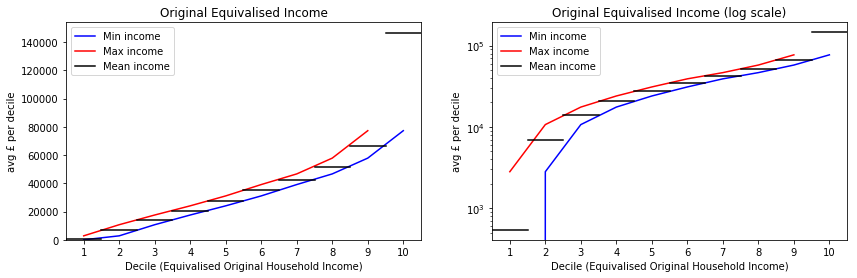

In [18]:
plot.figure(figsize=(14,4))
plot.subplot(1,2,1)
# plot.plot(data['Decile']-0.5,data['OriginalIncomeEq'],'kx',label='Mean income')
plot.plot(data['Decile']-0.5,data['OriginalIncomeEqMin'],'b-',label='Min income')
plot.plot(data['Decile']-0.5,data['OriginalIncomeEqMax'],'r-',label='Max income')
plot.plot([0,0,1],[0,origIncomeEq[0],origIncomeEq[0]],'k-',label='Mean income')
for d in range(1,len(decile)):
    plot.plot([d,d+1],[origIncomeEq[d],origIncomeEq[d]],'k-')
plot.xlim(0,10)
plot.xticks(np.arange(0.5,10.5),np.arange(1,11))
plot.ylim(0,plot.ylim()[1])
plot.xlabel(decLab)
plot.ylabel('avg £ per decile')
plot.legend()
plot.title('Original Equivalised Income')
plot.subplot(1,2,2)
# plot.plot(data['Decile']-0.5,data['OriginalIncomeEq'],'kx',label='Mean income')
plot.plot(data['Decile']-0.5,data['OriginalIncomeEqMin'],'b-',label='Min income')
plot.plot(data['Decile']-0.5,data['OriginalIncomeEqMax'],'r-',label='Max income')
plot.plot([0,1],[origIncomeEq[0],origIncomeEq[0]],'k-',label='Mean income')
for d in range(1,len(decile)):
    plot.plot([d,d+1],[origIncomeEq[d],origIncomeEq[d]],'k-')
plot.xlim(0,10)
plot.xticks(np.arange(0.5,10.5),np.arange(1,11))
# plot.ylim(0,plot.ylim()[1])
plot.xlabel(decLab)
plot.ylabel('avg £ per decile')
plot.yscale('log')
plot.legend()
plot.title('Original Equivalised Income (log scale)')

Worth noting that the mean is not quite halfway between the min and the max in each bin, so we know that we don't have linear distributions within each bin. We also fix the minimum of the first decile to be 0, but do not know the maximum of the highest decile

### Household size
Disposable income is equivalised to rank households. This reflects the common sense notion that, in order to enjoy a comparable standard of living, a household of, for example, three adults will need a higher level of income than a household of one person.

In this analysis the modified-OECD scale has been rescaled so that a two adult household equivalence value is 1.0.

* First adult: 0.67
* Second and subsequent adults 0.33 (per adult)
* Child aged 14 and over 0.33
* Child aged 13 and under 0.2

Text(0,0.5,'Equivalent Household size')

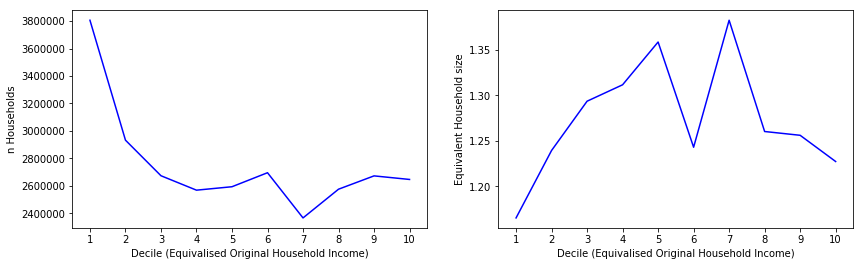

In [51]:
plot.figure(figsize=(14,4))
plot.subplot(1,2,1)
plot.plot(decile,nHouseholds,'b-')
plot.xlim(0.5,10.5)
plot.xticks(np.arange(1,11))
# plot.ylim(0,plot.ylim()[1])
plot.xlabel(decLab)
plot.ylabel('n Households')

nHouseMean=np.sum(nHouseholds)/10
plot.subplot(1,2,2)
plot.plot(decile,nEquiv,'b-')
plot.xlim(0.5,10.5)
plot.xticks(np.arange(1,11))
# plot.ylim(0,plot.ylim()[1])
plot.xlabel(decLab)
plot.ylabel('Equivalent Household size')
# plot.axhline(0,c='k')
# plot.axhline(1.2,c='gray',ls='--')

### Taxable Benefits
Taxable benefits include:
* Jobseeker's allowance (contribution based)
* Jobseeker's allowance (income based)
* Employment and support allowance
* Incapacity benefit
* State pension
* Carer's allowance

They are added to original income to give the taxable income

Text(0,0.5,'Taxable Benefits')

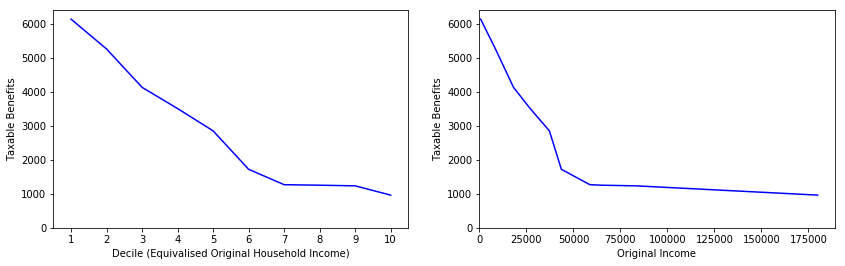

In [50]:
plot.figure(figsize=(14,4))
plot.subplot(1,2,1)
plot.plot(decile,taxableBen,'b-')
plot.xlim(0.5,10.5)
plot.xticks(np.arange(1,11))
plot.ylim(0,plot.ylim()[1])
plot.xlabel(decLab)
plot.ylabel('Taxable Benefits')

plot.subplot(1,2,2)
plot.plot(origIncome,taxableBen,'b-')
plot.xlim(0,plot.xlim()[1])
plot.ylim(0,plot.ylim()[1])
plot.xlabel('Original Income')
plot.ylabel('Taxable Benefits')

### Model the distribution (basic)

Assume a linear income distribution ($Y$) vs ranking ($n$): $Y(n) = Y_0 + an$, with $Y(N)=Y_1$ and $\Delta Y(n)=Y(n)-Y_1$.

We taper the bottom end to zer at some point in the lowest decile. The maximum is fixed, and the gradient is set such that the mean in that decile is the same as measured.

We assume the gradient in the top decile is linear - this is not true (it is highly peaked towards), but since we care about averages it should work out.

In [28]:
# construct model for equivalised income
y0Eq = np.array(data['OriginalIncomeEqMin'])
y1Eq = np.array(data['OriginalIncomeEqMax'])
ybarEq = np.array(data['OriginalIncomeEq'])

# find the gradient in each decile
# where no max (top decile, use the mean as the mid-point
model_aEq=np.where(np.isfinite(y1Eq),(y1Eq-y0Eq),(ybarEq-y0Eq)*2)

# adjust for zero-income
# Find the gradient which gives the same mean in the bottom decile 
n_zeroEq=1-(2*ybarEq[0]/y1Eq[0])
model_aEq[0]=y1Eq[0]/(1-n_zeroEq)
# adjust the bottom limit so the model works
y0Eq[0]=y1Eq[0]-model_aEq[0]

n0houseEq=n_zeroEq*nHouseholds[0]
n0equivEq=n0houseEq*nEquiv[0]
print('{:.1f}m households ({:.1f} equivalent individuals) with zero equivalent income'.format(n0houseEq/1e6,n0equivEq/1e6))

maxIncomeEq=y0Eq[-1]+model_aEq[-1]
print('Modelled max equivalent income: £{:.1f}k'.format(maxIncomeEq/1e3))
print('model_Eq',model_aEq)

# construct model for household income
y0Hh = np.array(data['OriginalIncomeEqMin'])
y1Hh = np.array(data['OriginalIncomeEqMax'])
# print(y0Hh,y1Hh)
# multiply boundaries by average of upper and lower equivalent household size (to prevent jumps)
for q in range(0,9):
    y1Hh[q]=y1Hh[q] * 0.5*(nEquiv[q]+nEquiv[q+1])
    y0Hh[q+1]=y1Hh[q]
ybarHh = np.array(origIncome)

# find the gradient in each decile
# where no max (top decile, use the mean as the mid-point
model_aHh=np.where(np.isfinite(y1Hh),(y1Hh-y0Hh),(ybarHh-y0Hh)*2)

# adjust for zero-income
# Find the gradient which gives the same mean in the bottom decile 
n_zeroHh=1-(2*ybarHh[0]/y1Hh[0])
model_aHh[0]=y1Hh[0]/(1-n_zeroHh)
# adjust the bottom limit so the model works
y0Hh[0]=y1Hh[0]-model_aHh[0]
# print(y0Hh,y1Hh)
n0houseHh=n_zeroHh*nHouseholds[0]
n0equivHh=n0houseHh*nEquiv[0]
print('{:.1f}m households ({:.1f} equivalent individuals) with zero household income'.format(n0houseHh/1e6,n0equivHh/1e6))

maxIncomeHh=y0Hh[-1]+model_aHh[-1]
print('Modelled max household income: £{:.1f}k'.format(maxIncomeHh/1e3))
print('model_Hh',model_aHh)
# define the simple model function
def modelA(n,modelEq=model_aEq,modelHh=model_aHh,y0Eq=y0Eq,y0Hh=y0Hh,nEquiv=nEquiv,Eq=True):
    # n is in the range 0-1 over full population
    # convert to decile
    if np.isscalar(n):
        q=np.min([9,int(np.floor(n*10))])
    else:
        q = np.floor(n*10).astype(int)
    # calculate the modelled earnings

    if Eq:
        model=modelEq
        y0=y0Eq
    else:
        model=modelHh
        y0=y0Hh
    mody=np.maximum(0,y0[q] + model[q]*(10*n-q))
    print('model',model)
    # mody = mody * nEquiv[q]
    return(mody)
print('Hh',modelA(0.5,Eq=False))
print('Eq',modelA(0.5,Eq=True))

2.3m households (2.7 equivalent individuals) with zero equivalent income
Modelled max equivalent income: £216.0k
model_Eq [  7314.34508349   7879.           6872.           6496.
   7030.           8035.           7537.          11183.
  19417.         138740.        ]
2.4m households (2.8 equivalent individuals) with zero household income
Modelled max household income: £264.0k
model_Hh [  9073.71701008  10159.76100849   9338.73820861   9246.18592114
   8318.27630896  10921.13174814  10298.57329936  11116.27641871
  23153.89368526 168034.        ]
model [  9073.71701008  10159.76100849   9338.73820861   9246.18592114
   8318.27630896  10921.13174814  10298.57329936  11116.27641871
  23153.89368526 168034.        ]
Hh 40436.0
model [  7314.34508349   7879.           6872.           6496.
   7030.           8035.           7537.          11183.
  19417.         138740.        ]
Eq 31085.0


### Sanity check
Check that the model looks sensible - plot the gradient across each decile as a sanity check

Text(0.5,1,'Household Income Gradient')

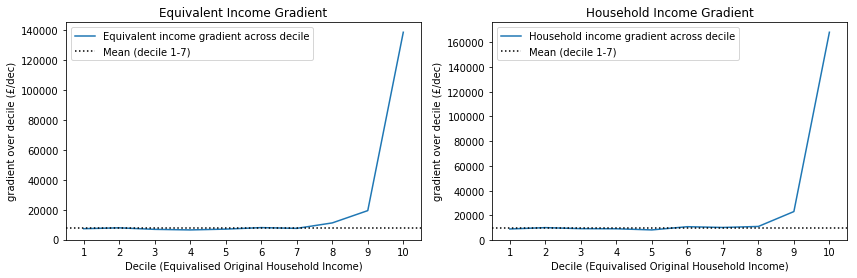

In [49]:
plot.figure(figsize=(14,4))
plot.subplot(1,2,1)
plot.plot(decile,model_aEq,label='Equivalent income gradient across decile')
plot.axhline(np.mean(model_aEq[1:-2]),c='k',ls=':',label='Mean (decile 1-7)')
plot.xlabel(decLab)
plot.xlim(0.5,10.5)
plot.xticks(np.arange(1,11))
plot.legend()
plot.ylabel('gradient over decile (£/dec)')
plot.title('Equivalent Income Gradient')

plot.subplot(1,2,2)
plot.plot(decile,model_aHh,label='Household income gradient across decile')
plot.axhline(np.mean(model_aHh[1:-2]),c='k',ls=':',label='Mean (decile 1-7)')
plot.xlabel(decLab)
plot.xlim(0.5,10.5)
plot.xticks(np.arange(1,11))
plot.legend()
plot.ylabel('gradient over decile (£/dec)')
plot.title('Household Income Gradient')

As expected, the gradient is roughly constant, increasing at the highest incomes. The gradient in the lowest decile is believable.

### Test model
test the model and compare with the publised deciles and means

model [  9073.71701008  10159.76100849   9338.73820861   9246.18592114
   8318.27630896  10921.13174814  10298.57329936  11116.27641871
  23153.89368526 168034.        ]
model [  7314.34508349   7879.           6872.           6496.
   7030.           8035.           7537.          11183.
  19417.         138740.        ]
Total equivalised income (measured): £1076.8bn
Total equivalised income (modelled): £1084.0bn
Relative Error: 0.67%
Total household income (measured): £1364.4bn
Total household income (modelled): £1373.0bn
Relative Error: 0.63%


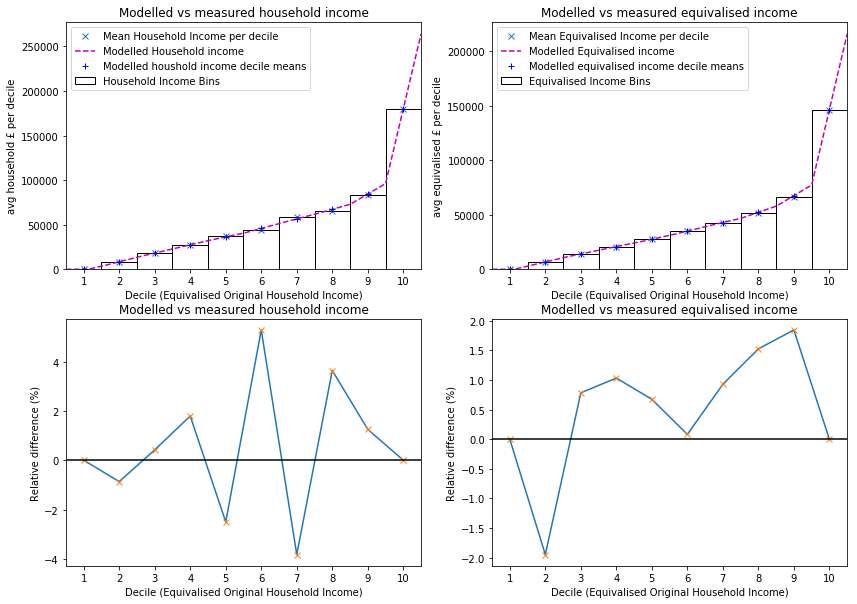

In [48]:
# need a lot of bins so sample it fully
relBin=1e-6
narr=np.arange(0,1,relBin)
harr=np.zeros_like(narr)
yarr=np.array(modelA(narr,Eq=False))
yarrOffset=np.zeros_like(yarr)
yarrEq=np.array(modelA(narr,Eq=True))
yarrEqOffset=np.zeros_like(yarrEq)

origEqMod=np.zeros_like(origIncome)
origMod=np.zeros_like(origIncome)
for q in np.arange(1,11):
    ind=np.where((narr<q/10)&(narr>=(q-1)/10))
    yind=yarrEq[ind]
    harr[ind]=nHouseholds[q-1]/len(yind)
    yarrEqOffset[ind]=yarrEq[ind]-origIncomeEq[q-1]
#     print(q,yarr[ind])
    origEqMod[q-1]=np.mean(yarrEq[ind])
    origMod[q-1]=np.mean(yarr[ind])

origEqOffset=origEqMod-origIncomeEq
origOffset=origMod-origIncomeEq

totIncomeMeas=np.sum(origIncome*nHouseholds)
totIncomeMod=np.sum(origMod*nHouseholds)
totIncomeRelErr=(totIncomeMod/totIncomeMeas)-1
totIncomeEqMeas=np.sum(origIncomeEq*nHouseholds)
totIncomeEqMod=np.sum(origEqMod*nHouseholds)
totIncomeEqRelErr=(totIncomeEqMod/totIncomeEqMeas)-1
# totIncomeMod2=np.sum(yarr*harr)
# totIncomeRelErr2=(totIncomeMod2/totIncomeMeas)-1

plot.figure(figsize=(14,10))
plot.subplot(2,2,1)
plot.plot(decile-0.5,origIncome,'x',label='Mean Household Income per decile')
plot.bar(decile-0.5,origIncome,width=1,ls='-',fc='m',fill=None,label='Household Income Bins')
plot.plot(narr*10,yarr,'m--',label='Modelled Household income')
plot.plot(decile-0.5,origMod,'b+',label='Modelled houshold income decile means')
plot.xlim(0,10)
plot.xticks(np.arange(0.5,10.5),np.arange(1,11))
# plot.ylim(0,plot.ylim()[1])
plot.xlabel(decLab)
plot.ylabel('avg household £ per decile')
plot.title('Modelled vs measured household income')
plot.legend()
# plot.ylim(1e2,1e5)
# plot.yscale('log')

plot.subplot(2,2,2)
plot.plot(decile-0.5,origIncomeEq,'x',label='Mean Equivalised Income per decile')
plot.bar(decile-0.5,origIncomeEq,width=1,ls='-',fc='m',fill=None,label='Equivalised Income Bins')
plot.plot(narr*10,yarrEq,'m--',label='Modelled Equivalised income')
plot.plot(decile-0.5,origEqMod,'b+',label='Modelled equivalised income decile means')
plot.xlim(0,10)
plot.xticks(np.arange(0.5,10.5),np.arange(1,11))
# plot.ylim(0,plot.ylim()[1])
plot.xlabel(decLab)
plot.ylabel('avg equivalised £ per decile')
plot.title('Modelled vs measured equivalised income')
plot.legend()
# plot.ylim(1e2,1e5)
# plot.yscale('log')

plot.subplot(2,2,3)
plot.plot(decile,100*(origMod/origIncome - 1))
plot.plot(decile,100*(origMod/origIncome - 1),'x')
plot.xlabel(decLab)
plot.axhline(0,c='k')
plot.xlim(0.5,10.5)
plot.xticks(np.arange(1,11))
plot.ylabel('Relative difference (%)')
plot.title('Modelled vs measured household income')

plot.subplot(2,2,4)
plot.plot(decile,100*(origEqMod/origIncomeEq - 1))
plot.plot(decile,100*(origEqMod/origIncomeEq - 1),'x')
plot.xlabel(decLab)
plot.axhline(0,c='k')
plot.xlim(0.5,10.5)
plot.xticks(np.arange(1,11))
plot.ylabel('Relative difference (%)')
plot.title('Modelled vs measured equivalised income')

print('Total equivalised income (measured): £{:.1f}bn'.format(totIncomeEqMeas/1e9))
print('Total equivalised income (modelled): £{:.1f}bn'.format(totIncomeEqMod/1e9))
print('Relative Error: {:.2f}%'.format(100*totIncomeEqRelErr))
print('Total household income (measured): £{:.1f}bn'.format(totIncomeMeas/1e9))
print('Total household income (modelled): £{:.1f}bn'.format(totIncomeMod/1e9))
print('Relative Error: {:.2f}%'.format(100*totIncomeRelErr))
# print('Total income (modelled check): £{:.1f}bn'.format(totIncomeMod2/1e9))
# print('Relative Error (check): {:.2f}%'.format(100*totIncomeRelErr2))


The model matches perfectly in the top & bottom deciles, by design, but over-predicts in most of the others for equivalised income. The result is a within 1% of total income. 

The variation between deciles is higher for household income because the boundaries are estimated.

### Model the distribution (advanced)
Create a model of income for each decile, $Y_d$, as a function of position in the decile $n=[0,N]$. We use a 2-order polynomial: $Y_d(n) = Y_{d,0} + a_dn + b_d n^2$, with $Y_{d,1}=Y_d(N)$, $Y_{d,0.5} = Y_d(\frac{N}{2})$ and $\overline{Y_d}=\int_0^N Y_d(n) dn$.

For deciles 2-9, fix $a$ and $b$ such that $Y_0$, $Y_1$ and $\overline{Y}$ are as measured.

Keep the lowest decile (decile 1) as linear, as per basic model, with $b=0$, and $a$ fixed to match measured $\overline{Y}$. This gives a value $n_0$, such that $Y(n_0)=Y_1 - a(N-n_0) = 0$.

Fix the value of $a$ for the highest decile (decile 10) to the final gradient of decile 9, and add $bn^2$ term to match measured $\overline{Y}$.


In [31]:
y0Eqb = np.array(data['OriginalIncomeEqMin'])
y1Eqb = np.array(data['OriginalIncomeEqMax'])
ybarEqb = np.array(data['OriginalIncomeEq'])
dyEqb=y1Eqb-y0Eqb
y05Eqb=0.5*(y0Eqb+y1Eqb)

# find the gradient in each decile
# where no max (top decile, use the mean as the mid-point
model_Eqb=np.zeros((len(y0Eqb),2))
model_Eqb[:,0]=6*(ybarEqb - y05Eqb) + dyEqb
model_Eqb[:,1]=6*(y05Eqb - ybarEqb)

# adjust for zero-income
# Find the gradient which gives the same mean in the bottom decile 
n_zeroEqb=1-(2*ybarEqb[0]/y1Eqb[0])
model_Eqb[0]=[y1Eqb[0]/(1-n_zeroEqb),0]
# adjust the bottom limit so the model works
y0Eqb[0]=y1Eqb[0]-model_Eqb[0,0]

model_Eqb[-1,0]=model_Eqb[-2,0]+2*model_Eqb[-2,1]
model_Eqb[-1,1]=3*(ybarEqb[-1] - y0Eqb[-1] - model_Eqb[-1,0]/2)

y0Hhb = np.array(data['OriginalIncomeEqMin'])
y1Hhb = np.array(data['OriginalIncomeEqMax'])
# multiply boundaries by average of upper and lower equivalent household size (to prevent jumps)
for q in range(0,9):
    y1Hhb[q]=y1Hhb[q] * 0.5*(nEquiv[q]+nEquiv[q+1])
    y0Hhb[q+1]=y1Hhb[q]
ybarHhb = np.array(data['OriginalIncome'])
dyHhb=y1Hhb-y0Hhb
y05Hhb=0.5*(y0Hhb+y1Hhb)

# find the gradient in each decile
# where no max (top decile, use the mean as the mid-point
model_Hhb=np.zeros((len(y0Hhb),2))
model_Hhb[:,0]=6*(ybarHhb - y05Hhb) + dyHhb
model_Hhb[:,1]=6*(y05Hhb - ybarHhb)

# adjust for zero-income
# Find the gradient which gives the same mean in the bottom decile 
n_zeroHhb=1-(2*ybarHhb[0]/y1Hhb[0])
model_Hhb[0]=[y1Hhb[0]/(1-n_zeroHhb),0]
# adjust the bottom limit so the model works
y0Hhb[0]=y1Hhb[0]-model_Hhb[0,0]

model_Hhb[-1,0]=model_Hhb[-2,0]+2*model_Hhb[-2,1]
model_Hhb[-1,1]=3*(ybarHhb[-1] - y0Hhb[-1] - model_Hhb[-1,0]/2)


# define the simple model function
def modelB(n,modelEq=model_Eqb,modelHh=model_Hhb,y0Eq=y0Eqb,y0Hh=y0Hhb,nEquiv=nEquiv,Eq=True):
    # n is in the range 0-1 over full population
    # convert to decile
    if np.isscalar(n):
        q=np.min([9,int(np.floor(n*10))])
    else:
        q = np.floor(n*10).astype(int)
    # calculate the modelled earnings
    if Eq:
        model=modelEq
        y0=y0Eq
    else:
        model=modelHh
        y0=y0Hh
    mody=np.maximum(0,y0[q] + model[q,0]*(10*n-q) + model[q,1]*(10*n-q)**2)
#     if not Eq:
#         # convert to full household income from equivalised household income
#         mody = mody * nEquiv[q]
    return(mody)


# model_a=np.where(np.isfinite(y1),(y1-y0),(ybar-y0)*2)

Total equivalised income (measured): £1364.4bn
Total equivalised income (modelled B): £1364.4bn
Relative Error (B): -0.00%
Total household income (measured): £1364.4bn
Total household income (modelled B): £1364.4bn
Relative Error (B): -0.00%


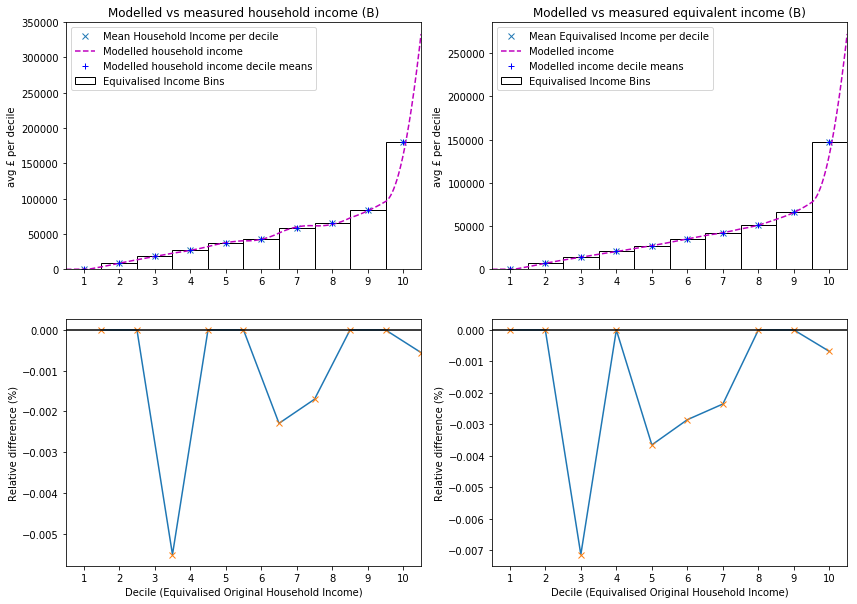

In [45]:
# need a lot of bins so sample it fully
relBinB=1e-6
narrB=np.arange(0,1,relBinB)
harrB=np.zeros_like(narrB)
yarrHhB=np.array(modelB(narrB,Eq=False))
yarrHhOffsetB=np.zeros_like(yarrHhB)
yarrEqB=np.array(modelB(narrB,Eq=True))
yarrEqOffsetB=np.zeros_like(yarrEqB)

origHhModB=np.zeros_like(origIncome)
origEqModB=np.zeros_like(origIncome)
for q in np.arange(1,11):
    ind=np.where((narrB<q/10)&(narrB>=(q-1)/10))
    yind=yarrHhB[ind]
    harrB[ind]=nHouseholds[q-1]/len(yind)
    yarrHhOffsetB[ind]=yarrHhB[ind]-origIncome[q-1]
    yarrEqOffsetB[ind]=yarrEqB[ind]-origIncomeEq[q-1]
#     print(q,yarr[ind])
    origHhModB[q-1]=np.mean(yarrHhB[ind])
    origEqModB[q-1]=np.mean(yarrEqB[ind])

origHhOffsetB=origHhModB-origIncome
origEqOffsetB=origEqModB-origIncomeEq

totEqIncomeMeasB=np.sum(origIncomeEq*nHouseholds*nEquiv)
totEqIncomeModB=np.sum(origEqModB*nHouseholds*nEquiv)
totEqIncomeRelErrB=(totEqIncomeModB/totEqIncomeMeasB)-1
# check by summing the whole model
totEqIncomeModB2=np.sum(yarrEqB*harrB)
totEqIncomeRelErrB2=(totEqIncomeModB2/totEqIncomeMeasB)-1

totHhIncomeMeasB=np.sum(origIncome*nHouseholds)
totHhIncomeModB=np.sum(origHhModB*nHouseholds)
totHhIncomeRelErrB=(totHhIncomeModB/totHhIncomeMeasB)-1
# check by summing the whole model
totHhIncomeModB2=np.sum(yarrHhB*harrB)
totHhIncomeRelErrB2=(totHhIncomeModB2/totHhIncomeMeasB)-1


plot.figure(figsize=(14,10))
plot.subplot(2,2,1)
plot.plot(decile-0.5,origIncome,'x',label='Mean Household Income per decile')
plot.bar(decile-0.5,origIncome,width=1,ls='-',fc='m',fill=None,label='Equivalised Income Bins')
plot.plot(narrB*10,yarrHhB,'m--',label='Modelled household income')
plot.plot(decile-0.5,origHhModB,'b+',label='Modelled household income decile means')
plot.xlim(0,10)
plot.xticks(np.arange(0.5,10.5),np.arange(1,11))
# plot.ylim(0,plot.ylim()[1])
# plot.xlabel(decLab)
plot.ylabel('avg £ per decile')
plot.title('Modelled vs measured household income (B)')
plot.legend()

plot.subplot(2,2,2)
plot.plot(decile-0.5,origIncomeEq,'x',label='Mean Equivalised Income per decile')
plot.bar(decile-0.5,origIncomeEq,width=1,ls='-',fc='m',fill=None,label='Equivalised Income Bins')
plot.plot(narrB*10,yarrEqB,'m--',label='Modelled income')
plot.plot(decile-0.5,origEqModB,'b+',label='Modelled income decile means')
plot.xlim(0,10)
plot.xticks(np.arange(0.5,10.5),np.arange(1,11))
# plot.ylim(0,plot.ylim()[1])
# plot.xlabel(decLab)
plot.ylabel('avg £ per decile')
plot.title('Modelled vs measured equivalent income (B)')
plot.legend()

plot.subplot(2,2,3)
plot.plot(decile,100*(origHhModB/origIncome - 1))
plot.plot(decile,100*(origHhModB/origIncome - 1),'x')
plot.xlabel(decLab)
plot.axhline(0,c='k')
plot.xlim(0.5,10.5)
plot.xticks(np.arange(1,11))
plot.ylabel('Relative difference (%)')
# plot.title('Modelled vs measured household income (B)')

plot.subplot(2,2,4)
plot.plot(decile,100*(origEqModB/origIncomeEq - 1))
plot.plot(decile,100*(origEqModB/origIncomeEq - 1),'x')
plot.xlabel(decLab)
plot.axhline(0,c='k')
plot.xlim(0.5,10.5)
plot.xticks(np.arange(1,11))
plot.ylabel('Relative difference (%)')
# plot.title('Modelled vs measured household income (B)')

print('Total equivalised income (measured): £{:.1f}bn'.format(totEqIncomeMeasB/1e9))
print('Total equivalised income (modelled B): £{:.1f}bn'.format(totEqIncomeModB/1e9))
print('Relative Error (B): {:.2f}%'.format(100*totEqIncomeRelErrB))
# print('Total income (modelled B check): £{:.1f}bn'.format(totEqIncomeModB2/1e9))
# print('Relative Error (B check): {:.2f}%'.format(100*totIncomeRelErrB2))
print('Total household income (measured): £{:.1f}bn'.format(totHhIncomeMeasB/1e9))
print('Total household income (modelled B): £{:.1f}bn'.format(totHhIncomeModB/1e9))
print('Relative Error (B): {:.2f}%'.format(100*totHhIncomeRelErrB))


Much better agreement than model A, by design, with better agreement with individual bins

## Model taxable benefits
Taxable benefits are modelled with a 2nd-order polynomial across each band, with the decile boundaries modway between the means. The first decile minimum and last decile maximum are defined such that the gradient is constant.

Total measured taxable benefits: £82.9bn
Total modelled taxable benefits: £82.9bn
Relative error: -0.0%


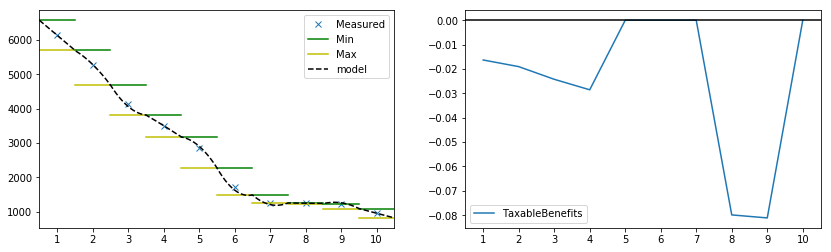

In [56]:
tb0=np.zeros_like(decile)
tb1=np.zeros_like(decile)
for q in range(0,9):
    tb1[q]=0.5*(taxableBen[q]+taxableBen[q+1])
    tb0[q+1]=tb1[q]
tb0[0]=tb1[0]+np.array(taxableBen[0]-np.array(taxableBen[1]))
tb1[-1]=tb0[-1]+(np.array(taxableBen)[-1]-np.array(taxableBen)[-2])
tbbar=np.array(taxableBen)
tb05=0.5*(tb0+tb1)
dtb=tb1-tb0

model_tb=np.zeros((len(tb0),2))
model_tb[:,0]=6*(tbbar - tb05) + dtb
model_tb[:,1]=6*(tb05 - tbbar)

def taxBenModel(n,y0=tb0,model=model_tb,y1=tb1):
    if np.isscalar(n):
        q=np.min([9,int(np.floor(n*10))])
    else:
        q = np.floor(n*10).astype(int)
    tb=np.maximum(0,y0[q] + model[q,0]*(10*n-q) + model[q,1]*(10*n-q)**2)
#     tb=np.maximum(0,y0[q] + (y1[q]-y0[q])*(10*n-q))
    return(tb)

ntb=np.arange(0,1,1e-6)
tbharr=np.zeros_like(ntb)
# tbOffset=np.zeros_like(ntb)
tbmod=taxBenModel(ntb)

taxBenMod=np.zeros_like(taxableBen)
for q in np.arange(1,11):
    ind=np.where((ntb<q/10)&(ntb>=(q-1)/10))
    tbind=tbmod[ind]
    tbharr[ind]=nHouseholds[q-1]/len(tbind)
#     tbOffset[ind]=tbmod[ind]-taxableBen[q-1]
    taxBenMod[q-1]=np.mean(tbmod[ind])
    
totTaxBenMeas=np.sum(taxableBen*nHouseholds)
totTaxBenMod=np.sum(taxBenMod*nHouseholds)
totTaxBenModDet=np.sum(tbmod*tbharr)
totTaxBenRelErr=totTaxBenMod/totTaxBenMeas - 1
totTaxBenRelErrDet=totTaxBenModDet/totTaxBenMeas - 1
print('Total measured taxable benefits: £{:.1f}bn'.format(totTaxBenMeas/1e9))
print('Total modelled taxable benefits: £{:.1f}bn'.format(totTaxBenMod/1e9))
print('Relative error: {:.1f}%'.format(100*totTaxBenRelErr))
# print('Total modelled taxable benefits (detailed): £{:.1f}bn'.format(totTaxBenModDet/1e9))
# print('Relative error: {:.1f}%'.format(100*totTaxBenRelErrDet))

plot.figure(figsize=(14,4))
plot.subplot(1,2,1)
# plot.bar(decile-0.5,taxableBen,width=1,ls='-',fc='m',fill=None,label='Measured bins')
plot.plot(decile-0.5,taxableBen,'x',label='Measured')
plot.plot([decile[0]-1,decile[0]],[tb0[0],tb0[0]],'g',label='Min')
plot.plot([decile[0]-1,decile[0]],[tb1[0],tb1[0]],'y',label='Max')
for q in range(1,10):
    plot.plot([decile[q]-1,decile[q]],[tb0[q],tb0[q]],'g')
    plot.plot([decile[q]-1,decile[q]],[tb1[q],tb1[q]],'y')
# plot.plot(decile,tb0)
# plot.plot(decile-1,tb1)
plot.xlim(0,10)
plot.xticks(np.arange(0.5,10.5),np.arange(1,11))
plot.plot(ntb*10,tbmod,'k--',label='model')
plot.legend()

plot.subplot(1,2,2)
plot.plot(decile,100*(taxBenMod/taxableBen-1))
plot.xlim(0.5,10.5)
plot.xticks(np.arange(1,11))
plot.axhline(0,c='k')
plot.legend()

Good enough! Some wiggles around decile 7, but that's OK.

## Test taxable income
Can we accurately model the taxable income?

The measured "direct tax" is the total of income tax, NI, student loan repayments and council tax (minus rebates).

Assume it is calculated based on original income + direct benefits (pension, DSA, child benefit etc.).

Model it with 2018/19 tax bands.

Caveat: we are working with total household income. Treating this as if it is a single individual's income will inflate the income tax. But we are ignoring NI and council tax. We can calculate the income tax only by assuming the taxable income (original income + taxable benefits) is divided between two people. Because income tax is progressive, this reduces the total tax paid. We can also assume this is split 80:20 between two people, which may be more representative of top earners.

In [57]:
# set tax bands and thresholds
tax20=11850
tax40=34500+tax20
tax45=150000+tax20
taxBandsNow=[[tax20,0.2],[tax40,0.2],[tax45,0.05]]

def dirTaxModFunc(inc,bands=taxBandsNow):
    if np.isscalar(inc):
        tax=0
        for t in range(len(bands)):
            if inc>bands[t][0]:
                tax=tax+(inc-bands[t][0])*bands[t][1]
        return tax
    else:
#         print(len(inc))
        inc=np.array(inc)
        tax=np.zeros_like(inc)
        for t in range(len(bands)):
#             print(t,bands[t])
            ind=np.where(inc > bands[t][0])
            if len(ind[0])>0:
#                 print(len(ind[0]),len(tax[ind[0]]),len((inc[ind[0]]-bands[t][0])*bands[t][1]))
                tax[ind[0]]=tax[ind[0]]+(inc[ind[0]]-bands[t][0])*bands[t][1]
        return tax


otherTax=dirTax-incomeTax
dirIncomeTaxMod=dirTaxModFunc(origIncome+taxableBen)
dirTotTaxMod=dirTaxModFunc(origIncome+dirBen)
fracIncomeTaxMod=dirIncomeTaxMod/(dirIncomeTaxMod+otherTax)

Find the income split that best matches the income tax paid

Text(0,0.5,'income fraction of dominant earner')

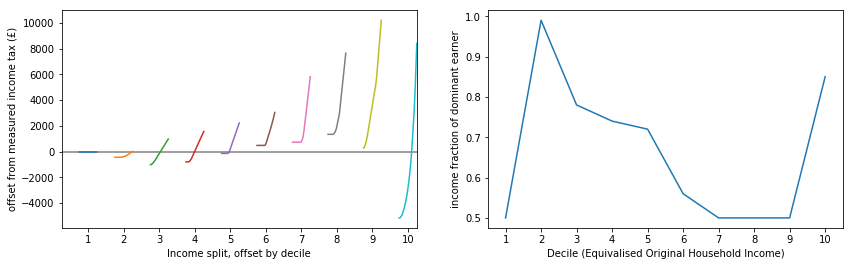

In [69]:
narrT=np.arange(0,1,relBinB)
tInc=np.array(modelB(narrT,Eq=False))
taxBen=np.array(taxBenModel(narrT))
tIncomePaid=np.zeros_like(narrT)

splits=np.arange(0.5,1.01,0.01)
splitTax=np.zeros_like(splits)
bestSplit=np.zeros(10)
splitTax=np.zeros((10,len(splits)))

plot.figure(figsize=(14,4))
plot.subplot(1,2,1)
plot.axhline(0,c='gray')
for q in range(0,10):
    ind=np.where((narrT<(q+1)/10)&(narrT>=(q)/10))
    for s in range(len(splits)):
        sp=splits[s]
        splitTax[q,s]=np.mean(dirTaxModFunc(sp*(tInc[ind]+taxBen[ind]))+dirTaxModFunc((1-sp)*(tInc[ind]+taxBen[ind])))
    bestSplit[q]=splits[np.argmin((splitTax[q,:]-incomeTax[q])**2)]
    tIncomePaid[ind]=dirTaxModFunc(bestSplit[q]*(tInc[ind]+taxBen[ind])) + dirTaxModFunc((1-bestSplit[q])*(tInc[ind]+taxBen[ind]))
    plot.plot(splits+q,splitTax[q,:]-incomeTax[q])    
plot.xlim(0,10)
plot.xticks(np.arange(0.75,10.75),np.arange(1,11))
plot.xlabel('Income split, offset by decile')
plot.ylabel('offset from measured income tax (£)')

plot.subplot(1,2,2)
plot.plot(decile,bestSplit)
plot.xlabel(decLab)
plot.xlim(0.5,10.5)
plot.xticks(np.arange(1,11))
plot.ylabel('income fraction of dominant earner')
# plot.axhline(0)
# plot.xlim(0,10)

For some deciles, there's no best-fit, implying that the 2-person model doesn't work. So either the income is from more than 2 people (seems unlikely) or they writing off significant amounts to tax.

Text(0,0.5,'Income (£)')

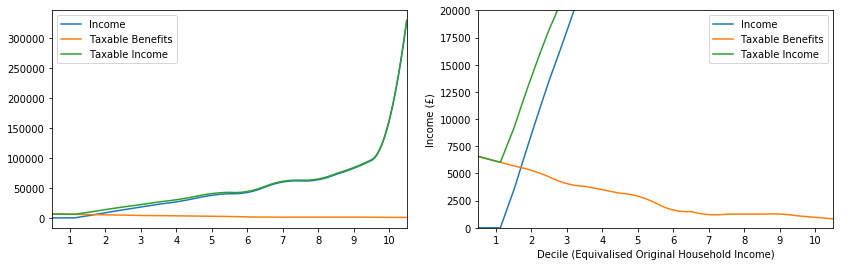

In [82]:
# model the tax paid in more detail, using the income model above
dirTotTaxModDet=np.zeros(10)
dirIncomeTaxModDet=np.zeros(10)
dirIncomeTaxModDet2p=np.zeros(10)
dirTaxModDet2p=np.zeros(10)
fracIncomeTaxModDet=np.zeros(10)
fracIncomeTaxModDet2p=np.zeros(10)
# dirTaxModDet2=np.zeros(10)
relBinT=1e-3
narrT=np.arange(0,1,relBinT)
harrT=np.zeros_like(narrT)
tInc=np.array(modelB(narrT,Eq=False))
taxBen=np.array(taxBenModel(narrT))
tTotPaid=np.zeros_like(narrT)
tIncomePaid=np.zeros_like(narrT)
tIncomePaid2p=np.zeros_like(narrT)
tIncomePaid2ptop=np.zeros_like(narrT)
# tTotPaid=dirTaxModFunc(tInc)
# tTotPaid=dirTaxModFunc(tInc)
for q in np.arange(1,11):
    ind=np.where((narrT<q/10)&(narrT>=(q-1)/10))
    harrT[ind]=nHouseholds[q-1]/len(ind)
    tIncomePaid[ind]=dirTaxModFunc(tInc[ind]+taxBen[ind])
    tIncomePaid2p[ind]=2*dirTaxModFunc((tInc[ind]+taxBen[ind])/2)
    tIncomePaid2p[ind]=dirTaxModFunc(bestSplit[q-1]*(tInc[ind]+taxBen[ind])) + dirTaxModFunc((1-bestSplit[q-1])*(tInc[ind]+taxBen[ind]))
    tTotPaid[ind]=dirTaxModFunc(tInc[ind]+taxBen[ind])
    dirIncomeTaxModDet[q-1]=np.mean(tIncomePaid[ind])
    dirIncomeTaxModDet2p[q-1]=np.mean(tIncomePaid2p[ind])
    dirTotTaxModDet[q-1]=np.mean(tTotPaid[ind])
    fracIncomeTaxModDet[q-1]=dirIncomeTaxModDet[q-1]/(dirIncomeTaxModDet[q-1]+otherTax[q-1])
    fracIncomeTaxModDet2p[q-1]=dirIncomeTaxModDet2p[q-1]/(dirIncomeTaxModDet2p[q-1]+otherTax[q-1])
    dirTaxModDet2p[q-1]=dirIncomeTaxModDet2p[q-1]+otherTax[q-1]

plot.figure(figsize=(14,4))
plot.subplot(1,2,1)
plot.plot(narrT*10,tInc,label='Income')
plot.plot(narrT*10,taxBen,label='Taxable Benefits')
plot.plot(narrT*10,tInc+taxBen,label='Taxable Income')
plot.xlim(0,10)
plot.xticks(np.arange(0.5,10.5),np.arange(1,11))
plot.legend()

plot.subplot(1,2,2)
plot.plot(narrT*10,tInc,label='Income')
plot.plot(narrT*10,taxBen,label='Taxable Benefits')
plot.plot(narrT*10,tInc+taxBen,label='Taxable Income')
plot.ylim(0,20000)
plot.xlim(0,10)
plot.xticks(np.arange(0.5,10.5),np.arange(1,11))
plot.legend()
plot.xlabel(decLab)
plot.ylabel('Income (£)')


Measured tax paid: £356.4bn
Measured income tax paid: £238.6bn
Detailed Modelled income tax paid (1 person): £340.6bn
Detailed Relative error: 42.7%
Detailed Modelled income tax paid (2 people): £243.6bn
Detailed Relative error: (2 people) 2.1%
Detailed Modelled total tax paid (2 people + other): £361.4bn
Detailed Relative error: (2 people + other) 1.4%


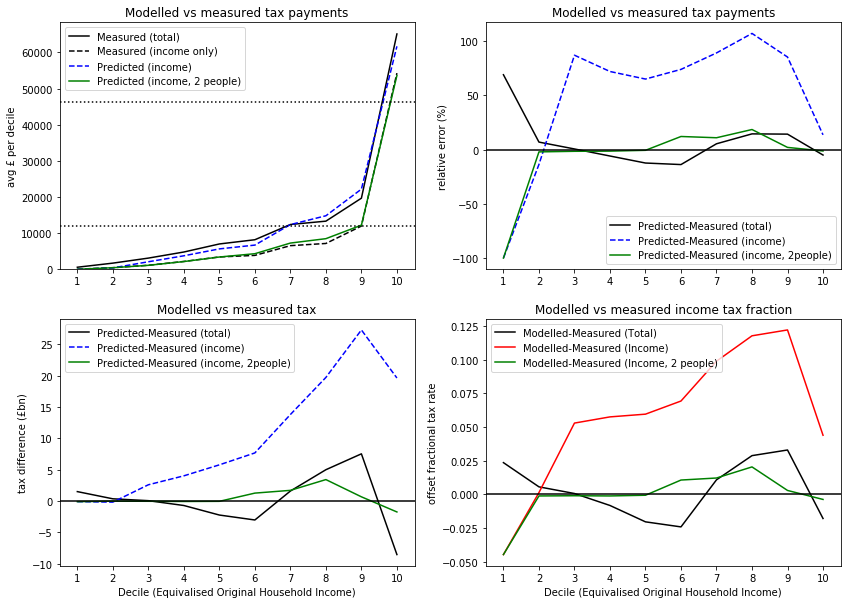

In [84]:
# plot the model vs the measure tax payments
plot.figure(figsize=(14,10))
plot.subplot(2,2,1)
plot.plot(decile,dirTax,'k-',label='Measured (total)')
plot.plot(decile,incomeTax,'k--',label='Measured (income only)')
# plot.plot(decile,dirTotTaxMod,'b-',label='Predicted')
plot.plot(decile,dirIncomeTaxMod,'b--',label='Predicted (income)')
# plot.plot(decile,dirIncomeTaxModDet,'r:',label='Predicted (income, detailed)')
plot.plot(decile,dirIncomeTaxModDet2p,'g-',label='Predicted (income, 2 people)')
plot.xlim(0.5,10.5)
plot.xticks(np.arange(1,11))
plot.ylim(0,plot.ylim()[1])
# plot.xlabel(decLab)
plot.ylabel('avg £ per decile')
plot.axhline(tax20,c='k',ls=':')
plot.axhline(tax40,c='k',ls=':')
plot.axhline(tax45,c='k',ls=':')
plot.legend()
plot.title('Modelled vs measured tax payments')

plot.subplot(2,2,2)
plot.plot(decile,100*(dirTotTaxMod/dirTax-1),'k-',label='Predicted-Measured (total)')
plot.plot(decile,100*(dirIncomeTaxMod/incomeTax-1),'b--',label='Predicted-Measured (income)')
# plot.plot(decile,100*(dirIncomeTaxModDet/incomeTax-1),'r:',label='Predicted-Measured (income, detailed)')
plot.plot(decile,100*(dirIncomeTaxModDet2p/incomeTax-1),'g-',label='Predicted-Measured (income, 2people)')
plot.xlim(0.5,10.5)
plot.xticks(np.arange(1,11))
# plot.xlim(0,plot.xlim()[1])
# plot.ylim(0,plot.ylim()[1])
# plot.xlabel(decLab)
plot.ylabel('relative error (%)')
plot.axhline(0,c='k')
plot.legend()
plot.title('Modelled vs measured tax payments')

effTaxTotMeas=dirTax/(origIncome+dirBen)
effTaxIncomeMeas=incomeTax/origIncome
effTaxTotMod=dirTotTaxMod/(origIncome+dirBen)
effTaxIncomeMod=dirIncomeTaxModDet/origIncome
effTaxIncomeModDet2p=dirIncomeTaxModDet2p/origIncome

plot.subplot(2,2,3)
plot.plot(decile,(dirTotTaxMod-dirTax)*nHouseholds/1e9,'k-',label='Predicted-Measured (total)')
plot.plot(decile,(dirIncomeTaxMod-incomeTax)*nHouseholds/1e9,'b--',label='Predicted-Measured (income)')
# plot.plot(decile,(dirIncomeTaxModDet-incomeTax)*nHouseholds/1e9,'r:',label='Predicted-Measured (income, detailed)')
plot.plot(decile,(dirIncomeTaxModDet2p-incomeTax)*nHouseholds/1e9,'g-',label='Predicted-Measured (income, 2people)')
plot.xlim(0.5,10.5)
plot.xticks(np.arange(1,11))
# plot.ylim(0,plot.ylim()[1])
plot.xlabel(decLab)
plot.ylabel('tax difference (£bn)')
plot.axhline(0,c='k')
# plot.axhline(tax40,c='k',ls=':')
# plot.axhline(tax45,c='k',ls=':')
plot.legend()
plot.title('Modelled vs measured tax')

plot.subplot(2,2,4)
plot.plot(decile,effTaxTotMod-effTaxTotMeas,'k-',label='Modelled-Measured (Total)')
plot.plot(decile,effTaxIncomeMod-effTaxIncomeMeas,'r-',label='Modelled-Measured (Income)')
plot.plot(decile,effTaxIncomeModDet2p-effTaxIncomeMeas,'g-',label='Modelled-Measured (Income, 2 people)')
plot.xlim(0.5,10.5)
plot.xticks(np.arange(1,11))
# plot.ylim(0,plot.ylim()[1])
plot.xlabel(decLab)
plot.ylabel('offset fractional tax rate')
plot.axhline(0,c='k')
# plot.axhline(tax40,c='k',ls=':')
# plot.axhline(tax45,c='k',ls=':')
plot.legend()
plot.title('Modelled vs measured income tax fraction')


totTaxMeas=np.sum(dirTax*nHouseholds)
totIncomeTaxMeas=np.sum(incomeTax*nHouseholds)
totTaxMod=np.sum(dirTotTaxMod*nHouseholds)
totTaxModDet=np.sum(dirTotTaxModDet*nHouseholds)
totTaxRelErr=totTaxMod/totTaxMeas - 1
totTaxDetRelErr=totTaxModDet/totTaxMeas - 1
totIncomeTaxMod=np.sum(dirIncomeTaxMod*nHouseholds)
totIncomeTaxModDet=np.sum(dirIncomeTaxModDet*nHouseholds)
totIncomeTaxModDet2p=np.sum(dirIncomeTaxModDet2p*nHouseholds)
totIncomeTaxRelErr=totIncomeTaxMod/totIncomeTaxMeas - 1
totIncomeTaxDetRelErr=totIncomeTaxModDet/totIncomeTaxMeas - 1
totIncomeTaxDetRelErr2p=totIncomeTaxModDet2p/totIncomeTaxMeas - 1

totTaxModDet2p=np.sum((dirIncomeTaxModDet2p+otherTax)*nHouseholds)
totTaxDetRelErr2p=totTaxModDet2p/totTaxMeas - 1

print('Measured tax paid: £{:.1f}bn'.format(totTaxMeas/1e9))
# print('Modelled tax paid: £{:.1f}bn'.format(totTaxMod/1e9))
# print('Relative error: {:.1f}%'.format(totTaxRelErr*100))
# # print('Detailed Modelled tax paid: £{:.1f}bn'.format(totTaxModDet/1e9))
# # print('Detailed Relative error: {:.1f}%'.format(totTaxDetRelErr*100))
print('Measured income tax paid: £{:.1f}bn'.format(totIncomeTaxMeas/1e9))
# print('Modelled income tax paid: £{:.1f}bn'.format(totIncomeTaxMod/1e9))
# print('Relative error: {:.1f}%'.format(totIncomeTaxRelErr*100))
print('Detailed Modelled income tax paid (1 person): £{:.1f}bn'.format(totIncomeTaxModDet/1e9))
print('Detailed Relative error: {:.1f}%'.format(totIncomeTaxDetRelErr*100))
print('Detailed Modelled income tax paid (2 people): £{:.1f}bn'.format(totIncomeTaxModDet2p/1e9))
print('Detailed Relative error: (2 people) {:.1f}%'.format(totIncomeTaxDetRelErr2p*100))
print('Detailed Modelled total tax paid (2 people + other): £{:.1f}bn'.format(totTaxModDet2p/1e9))
print('Detailed Relative error: (2 people + other) {:.1f}%'.format(totTaxDetRelErr2p*100))


# print(np.sum(data['DirectTax']*nHouseholds))

totalBenefits=np.sum(dirBen*nHouseholds)
totalDirectTax=np.sum(dirTax*nHouseholds)
totalNetIncome=totalDirectTax-totalBenefits




If we only consider total tax then this understimates total tax paid in some bands, and overerestimates in others. How inaccurate is it, and how does the total compare?

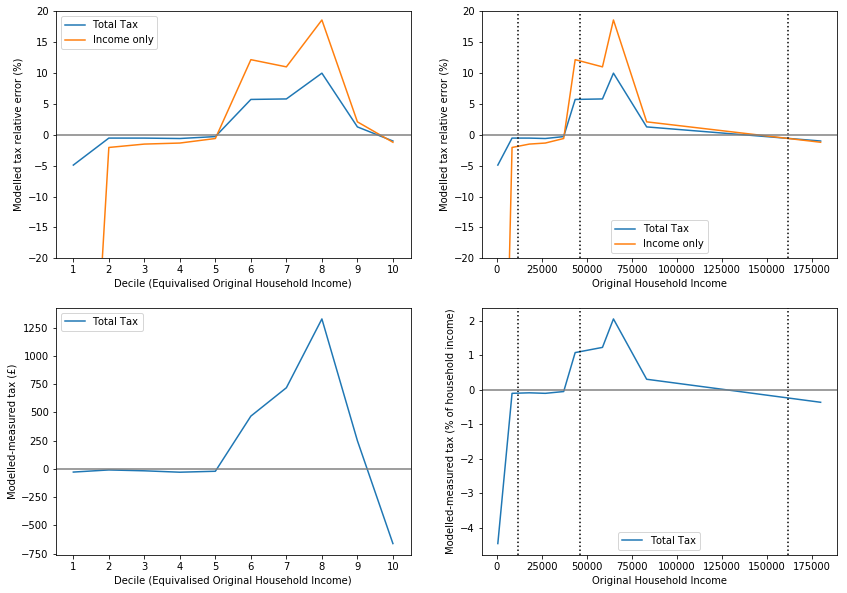

In [94]:
# calculate total tax paid
plot.figure(figsize=(14,10))
plot.subplot(2,2,1)
plot.plot(decile,100*(dirTaxModDet2p/dirTax-1),label='Total Tax')
plot.plot(decile,100*(dirIncomeTaxModDet2p/incomeTax-1),label='Income only')
plot.xlabel(decLab)
plot.ylabel('Modelled tax relative error (%)')
plot.ylim(-20,20)
plot.xlim(0.5,10.5)
plot.xticks(np.arange(1,11))
plot.axhline(0,c='gray')
plot.legend()

plot.subplot(2,2,2)
plot.plot(origIncome,100*(dirTaxModDet2p/dirTax-1),label='Total Tax')
plot.plot(origIncome,100*(dirIncomeTaxModDet2p/incomeTax-1),label='Income only')
plot.xlabel('Original Household Income')
plot.ylabel('Modelled tax relative error (%)')
plot.ylim(-20,20)
# plot.xlim(1,10)
plot.axvline(tax20,c='k',ls=':')
plot.axvline(tax40,c='k',ls=':')
plot.axvline(tax45,c='k',ls=':')
plot.axhline(0,c='gray')
plot.legend()

plot.subplot(2,2,3)
plot.plot(decile,dirTaxModDet2p-dirTax,label='Total Tax')
# plot.plot(decile,dirIncomeTaxModDet2p-incomeTax,'--',label='Income only')
plot.xlabel(decLab)
plot.ylabel('Modelled-measured tax (£)')
# plot.ylim(-20,20)
plot.xlim(0.5,10.5)
plot.xticks(np.arange(1,11))
plot.axhline(0,c='gray')
plot.legend()

plot.subplot(2,2,4)
plot.plot(origIncome,100*(dirTaxModDet2p-dirTax)/origIncome,label='Total Tax')
# plot.plot(origIncome,dirIncomeTaxModDet2p-incomeTax,'--',label='Income only')
plot.xlabel('Original Household Income')
plot.ylabel('Modelled-measured tax (% of household income)')
# plot.ylim(-20,20)
# plot.xlim(1,10)
plot.axvline(tax20,c='k',ls=':')
plot.axvline(tax40,c='k',ls=':')
plot.axvline(tax45,c='k',ls=':')
plot.axhline(0,c='gray')
plot.legend()


The errors are 5-10% for total tax in all deciles, typically overpredicting for high earners and under-predicting for low earners. Note that the income tax for the lowest decile is very poorly predicted, but is a small contributor to the total. The effect is a few percent of household income


# The national picture
How does the nation do interms of tax and benefits. In what follows we do not use the detailed income model, which is known to be inaccurate, reliying instead on the averages within deciles.

In [95]:
# calculate total benfits and tax and net national income
totalBenefits=np.sum(dirBen*nHouseholds)/1e9
totalDirectTax=np.sum(dirTax*nHouseholds)/1e9
totalNetIncome=totalDirectTax-totalBenefits
print('Total direct benefits: £{}bn'.format(int(totalBenefits)))
print('Total direct tax: £{}bn'.format(int(totalDirectTax)))
print('Net National Income: £{}bn'.format(int(totalNetIncome)))

Total direct benefits: £185bn
Total direct tax: £356bn
Net National Income: £170bn


### Plot incomes across deciles

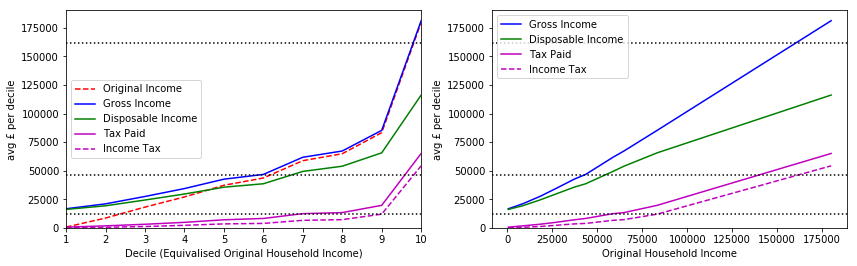

In [96]:
plot.figure(figsize=(14,4))
plot.subplot(1,2,1)
plot.plot(decile,origIncome,'r--',label='Original Income')
plot.plot(decile,grossIncome,'b-',label='Gross Income')
plot.plot(decile,dispIncome,'g-',label='Disposable Income')
plot.plot(decile,dirTax,'m-',label='Tax Paid')
plot.plot(decile,incomeTax,'m--',label='Income Tax')
plot.legend()
plot.xlim(1,10)
plot.ylim(0,plot.ylim()[1])
plot.xlabel(decLab)
plot.ylabel('avg £ per decile')
plot.axhline(tax20,c='k',ls=':')
plot.axhline(tax40,c='k',ls=':')
plot.axhline(tax45,c='k',ls=':')

plot.subplot(1,2,2)
plot.plot(origIncome,grossIncome,'b-',label='Gross Income')
plot.plot(origIncome,dispIncome,'g-',label='Disposable Income')
plot.plot(origIncome,dirTax,'m-',label='Tax Paid')
plot.plot(origIncome,incomeTax,'m--',label='Income Tax')
plot.legend()
plot.ylim(0,plot.ylim()[1])
plot.xlabel('Original Household Income')
plot.ylabel('avg £ per decile')
plot.axhline(tax20,c='k',ls=':')
plot.axhline(tax40,c='k',ls=':')
plot.axhline(tax45,c='k',ls=':')

## New model
Construct a new model, with uniform benefits, and different tax bands

In [97]:
# set out the benfits and tax thresholds
uniBen=17000
origNew=origIncome
dirBenNew=[uniBen]*len(dirBen)
grossNew=origNew+dirBenNew

# set tax bands and thresholds
th1=0
th2=50000
th3=100000
tax1=0.48
tax2=0.48
tax3=0.48
taxBandsNew=[[th1,tax1],[th2,tax2],[th3,tax3]]

def dirTaxModFuncNew(inc,bands=taxBandsNew):
    if np.isscalar(inc):
        tax=0
        for t in range(len(bands)):
            if inc>bands[t][0]:
                tax=tax+(inc-bands[t][0])*bands[t][1]
        return tax
    else:
#         print(len(inc))
        inc=np.array(inc)
        tax=np.zeros_like(inc)
        for t in range(len(bands)):
#             print(t,bands[t])
            ind=np.where(inc > bands[t][0])
            if len(ind[0])>0:
#                 print(len(ind[0]),len(tax[ind[0]]),len((inc[ind[0]]-bands[t][0])*bands[t][1]))
                tax[ind[0]]=tax[ind[0]]+(inc[ind[0]]-bands[t][0])*bands[t][1]
        return tax


# set tax thresholds (uniform across incomes)
taxPaidNew=np.zeros(10)
th1=0
th2=50000
th3=100000
tax1=0.48
tax2=0.48
tax3=0.48
for q in range(10):
    narr=np.arange(q*0.1,(q+1)*0.1,0.01)
    # calculate taxable income in each tax band
    tInc=modelB(narr,Eq=False)
    t1=np.maximum(0,np.where(tInc<th2,tInc-th1,th2-th1))
    t2=np.maximum(0,np.where(tInc<th3,tInc-th2,th3-th2))
    t3=np.maximum(0,tInc-th3)
    tPaidNew=t1*tax1 + t2*tax2 + t3*tax3
    taxPaidNew[q]=np.mean(tPaidNew)

# calculate disposable income
dispNew=grossNew-taxPaidNew
# calculate totan benefits and taxes, and compare with old model
totalBenefitsNew=np.sum(dirBenNew*nHouseholds)/1e9
totalDirectTaxNew=np.sum(taxPaidNew*nHouseholds)/1e9
totalNetIncomeNew=totalDirectTaxNew-totalBenefitsNew

print('Total direct benefits: £{}bn [change £{}bn]'.format(int(totalBenefitsNew),int(totalBenefitsNew-totalBenefits)/1e9))
print('Total direct tax: £{}bn [change £{}bn]'.format(int(totalDirectTaxNew),int(totalDirectTaxNew-totalDirectTax)))
print('Net National Income: £{}bn [change £{}bn]'.format(int(totalNetIncomeNew),int(totalNetIncomeNew-totalNetIncome)))

Total direct benefits: £468bn [change £2.82e-07bn]
Total direct tax: £635bn [change £279bn]
Net National Income: £167bn [change £-2bn]


Text(0.5,1,'New model (by income)')

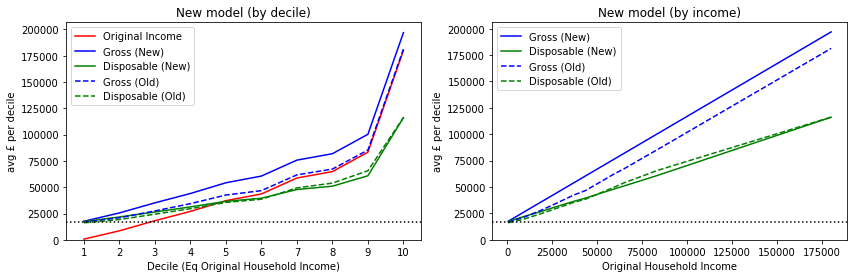

In [99]:
plot.figure(figsize=(14,4))
plot.subplot(1,2,1)
plot.plot(decile,origIncome,'r-',label='Original Income')
plot.plot(decile,grossNew,'b-',label='Gross (New)')
plot.plot(decile,dispNew,'g-',label='Disposable (New)')
plot.plot(decile,grossIncome,'b--',label='Gross (Old)')
plot.plot(decile,dispIncome,'g--',label='Disposable (Old)')
plot.legend()
plot.xlim(0.5,10.5)
plot.xticks(np.arange(1,11))
plot.xlabel('Decile (Eq Original Household Income)')
plot.ylabel('avg £ per decile')
plot.ylim(0,plot.ylim()[1])
plot.axhline(uniBen,c='k',ls=':')
plot.title('New model (by decile)')

plot.subplot(1,2,2)
plot.plot(origIncome,grossNew,'b-',label='Gross (New)')
plot.plot(origIncome,dispNew,'g-',label='Disposable (New)')
plot.plot(origIncome,grossIncome,'b--',label='Gross (Old)')
plot.plot(origIncome,dispIncome,'g--',label='Disposable (Old)')
plot.legend()
plot.xlabel('Original Household Income')
plot.ylabel('avg £ per decile')
plot.ylim(0,plot.ylim()[1])
plot.axhline(uniBen,c='k',ls=':')
plot.title('New model (by income)')


### Compare the models
Compare benefits and taxes

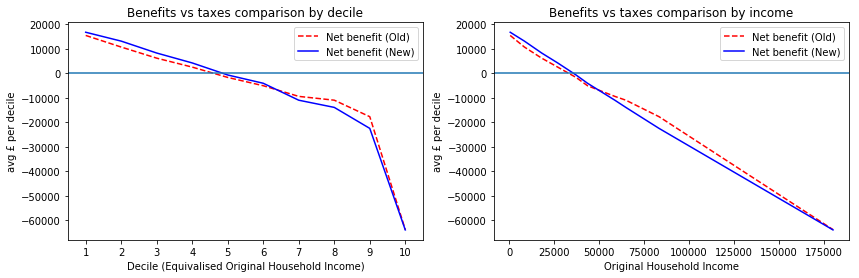

In [101]:
plot.figure(figsize=(14,4))
plot.subplot(1,2,1)
plot.title('Benefits vs taxes comparison by decile')
plot.plot(decile,dirBen-dirTax,'r--',label='Net benefit (Old)')
plot.plot(decile,dirBenNew-taxPaidNew,'b-',label='Net benefit (New)')
plot.xlim(0.5,10.5)
plot.xticks(np.arange(1,11))
plot.xlabel(decLab)
plot.ylabel('avg £ per decile')
plot.axhline(0,c='gray')
plot.legend()

plot.subplot(1,2,2)
plot.title('Benefits vs taxes comparison by income')
plot.plot(origIncome,dirBen-dirTax,'r--',label='Net benefit (Old)')
plot.plot(origIncome,dirBenNew-taxPaidNew,'b-',label='Net benefit (New)')
plot.xlabel('Original Household Income')
plot.ylabel('avg £ per decile')
plot.axhline(0,c='gray')
plot.legend()

Those in deciles 0-5 are net beneficiaries, 6-10 are net contributors, and similar to current system

### Plot change across deciles
How does the change affect each decile

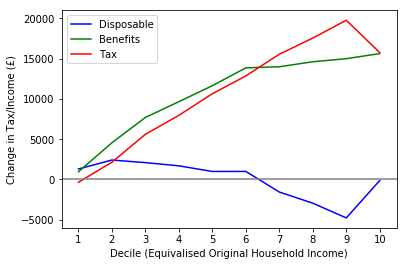

In [106]:
plot.plot(decile,dispNew-dispIncome,'b-',label='Disposable')
plot.plot(decile,dirBenNew-dirBen,'g-',label='Benefits')
plot.plot(decile,taxPaidNew-dirTax,'r-',label='Tax')
plot.legend()
plot.xlim(0.5,10.5)
plot.xticks(np.arange(1,11))
plot.xlabel(decLab)
plot.ylabel('Change in Tax/Income (£)')
plot.axhline(0,c='gray')


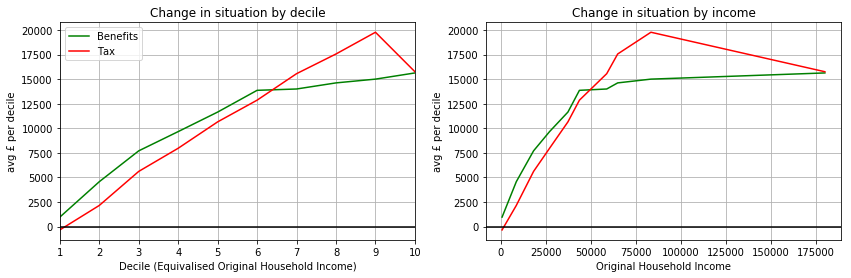

In [108]:
plot.figure(figsize=(14,4))
plot.subplot(1,2,1)
plot.title('Change in situation by decile')
plot.plot(decile,dirBenNew-dirBen,'g-',label='Benefits')
plot.plot(decile,taxPaidNew-dirTax,'r-',label='Tax')
plot.legend()
plot.xlim(1,10)
plot.xlabel(decLab)
plot.ylabel('avg £ per decile')
plot.axhline(0,c='k')
plot.grid()

plot.subplot(1,2,2)
plot.title('Change in situation by income')
plot.plot(origIncome,dirBenNew-dirBen,'g-',label='Benefits')
plot.plot(origIncome,taxPaidNew-dirTax,'r-',label='Tax')
plot.xlabel('Original Household Income')
plot.ylabel('avg £ per decile')
plot.axhline(0,c='k')
plot.grid()

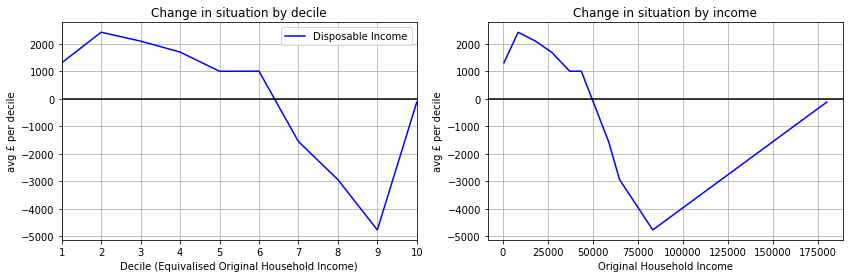

In [110]:
plot.figure(figsize=(14,4))
plot.subplot(1,2,1)
plot.title('Change in situation by decile')
plot.plot(decile,dispNew-dispIncome,'b-',label='Disposable Income')
plot.legend()
plot.xlim(1,10)
plot.xlabel(decLab)
plot.ylabel('avg £ per decile')
plot.axhline(0,c='k')
plot.grid()

plot.subplot(1,2,2)
plot.title('Change in situation by income')
plot.plot(origIncome,dispNew-dispIncome,'b-',label='Disposable Income')
plot.xlabel('Original Household Income')
plot.ylabel('avg £ per decile')
plot.axhline(0,c='k')
plot.grid()

Those in deciles 1-6 benefit at a few £k/year. Those in higher deciles suffer more

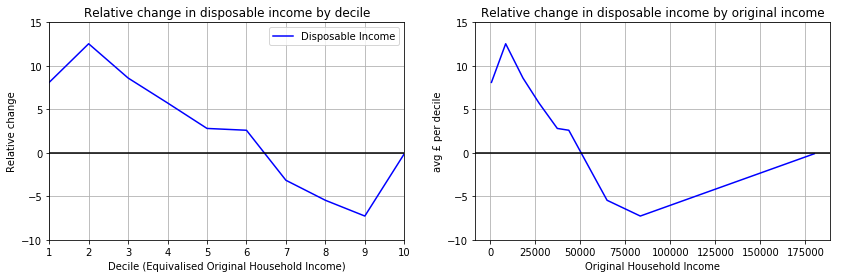

In [111]:
plot.figure(figsize=(14,4))
plot.subplot(1,2,1)
plot.title('Relative change in disposable income by decile')
plot.plot(decile,100*(dispNew/dispIncome-1),'b-',label='Disposable Income')
plot.legend()
plot.xlim(1,10)
plot.xlabel(decLab)
plot.ylabel('Relative change')
plot.axhline(0,c='k')
plot.ylim(-10,15)
plot.grid()

plot.subplot(1,2,2)
plot.title('Relative change in disposable income by original income')
plot.plot(origIncome,100*(dispNew/dispIncome-1),'b-',label='Disposable Income')
plot.xlabel('Original Household Income')
plot.ylabel('avg £ per decile')
plot.axhline(0,c='k')
plot.ylim(-10,15)
plot.grid()

Relative changes are at the ~10% level max.